# Problem Statement 1:

1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
# Importing libraries
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
ls

 Volume in drive C is ssd
 Volume Serial Number is 344C-651C

 Directory of C:\Users\phoneclicker\Downloads\excelr_kd\ASSIGNMENT\slr

01/13/2023  12:36 PM    <DIR>          .
01/13/2023  12:36 PM    <DIR>          ..
01/11/2023  08:16 PM    <DIR>          .ipynb_checkpoints
11/29/2022  03:33 PM               218 delivery_time.csv
11/29/2022  03:33 PM               454 Salary_Data.csv
01/13/2023  12:35 PM            60,636 sayali.ipynb
01/02/2023  12:04 PM           149,641 SLR_ASSIGNMENT.ipynb
               4 File(s)        210,949 bytes
               3 Dir(s)  35,040,423,936 bytes free


# EDA

In [3]:
# Reading the file
delivery_time = pd.read_csv('delivery_time.csv')
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
# Sorting names for given columns
delivery_time1 = delivery_time.rename(columns={'Delivery Time':'dt','Sorting Time':'st'})
delivery_time1.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
# Shape of file
delivery_time1.shape

(21, 2)

In [6]:
delivery_time1.isnull().sum()

dt    0
st    0
dtype: int64

In [7]:
# file description
delivery_time1.describe()

,dt,st
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
# tail info of file
delivery_time1.tail()

,dt,st
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


# Correlation Analysis

In [9]:
# Correlation Analysis
delivery_time1.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


# Visualization

Shape of dataframe (21, 2)
      dt  st
0  21.00  10
1  13.50   4
2  19.75   6
3  24.00   9
4  29.00  10
5  15.35   6
6  19.00   7
7   9.50   3
8  17.90  10
9  18.75   9


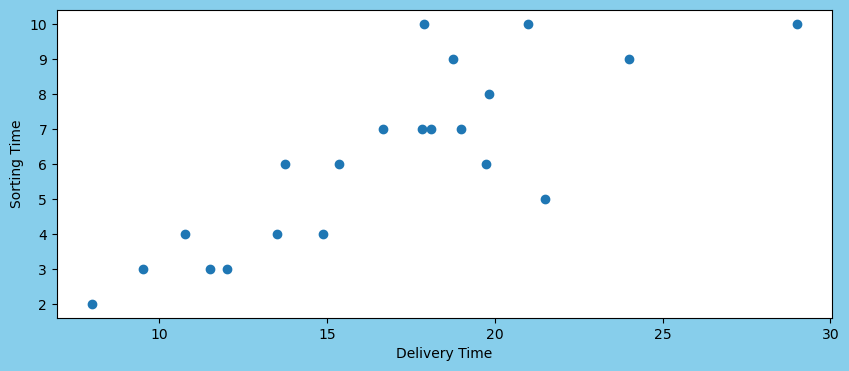

In [10]:
# Plotting the scatter plot
print('Shape of dataframe',delivery_time1.shape)
print('='*20)
print(delivery_time1.head(10))
plt.figure(figsize=(10,4),facecolor='skyblue')
plt.scatter(delivery_time1.dt,delivery_time1.st)
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

<Figure size 500x500 with 0 Axes>

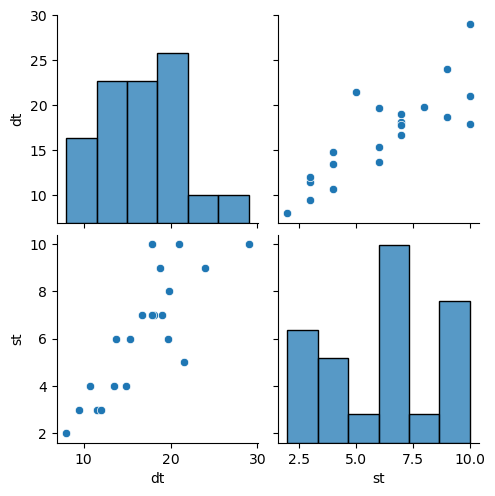

In [11]:
plt.figure(figsize=(5,5))
sns.pairplot(delivery_time1)
plt.show()

Scatter plots shows the positive correlation

# Model 1

In [35]:
# Preparing 1st model with summary
first_model = smf.ols("dt~st",data=delivery_time1).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        14:02:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Predicting 1st model
first_model.predict()

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

# Model 2

In [37]:
# Preparing second model using log on features
second_model = smf.ols('dt~np.log(st)',data=delivery_time1).fit()
second_model.rsquared

0.6954434611324223

In [38]:
# Predicting second model
second_model.predict()

array([21.98291253, 13.69651659, 17.36330521, 21.03009382, 21.98291253,
       17.36330521, 18.75735354, 11.09488867, 21.98291253, 21.03009382,
       19.96493314, 13.69651659, 18.75735354, 11.09488867, 11.09488867,
       13.69651659, 17.36330521, 18.75735354,  7.42810005, 18.75735354,
       15.71449599])

# Model 3

In [39]:
# Preparing third model using log on target value
third_model = smf.ols('np.log(dt)~st',data=delivery_time1).fit()
third_model.rsquared

0.7109478980584187

In [40]:
# Predicting third model
third_model.predict()

array([3.17688783, 2.54357825, 2.75468144, 3.07133624, 3.17688783,
       2.75468144, 2.86023304, 2.43802665, 3.17688783, 3.07133624,
       2.96578464, 2.54357825, 2.86023304, 2.43802665, 2.43802665,
       2.54357825, 2.75468144, 2.86023304, 2.33247505, 2.86023304,
       2.64912984])

# Model 4

In [41]:
fourth_model = smf.ols('dt~np.exp(st)',data=delivery_time1).fit()
fourth_model.rsquared

0.3611177022709089

In [42]:
fourth_model.predict()

array([23.73908236, 15.10503289, 15.24210913, 18.26776013, 23.73908236,
       15.24210913, 15.51451022, 15.09147084, 23.73908236, 18.26776013,
       16.25497317, 15.10503289, 15.51451022, 15.09147084, 15.09147084,
       15.10503289, 15.24210913, 15.51451022, 15.08648164, 15.51451022,
       15.14189837])

# Model 5

In [43]:
# Preparing fourth model using square on sorting time
delivery_time1['st_Sq'] = delivery_time1.st**2
fifth_model_quad = smf.ols('np.log(dt)~st+st_Sq',data=delivery_time1).fit()
fifth_model_quad.rsquared

0.7648666342953729

In [44]:
#Predicting fourth model
fifth_model_quad.predict()

array([3.07486324, 2.55794231, 2.8329741 , 3.05291276, 3.07486324,
       2.8329741 , 2.9319682 , 2.38190461, 3.07486324, 3.05291276,
       3.00528108, 2.55794231, 2.9319682 , 2.38190461, 2.38190461,
       2.55794231, 2.8329741 , 2.9319682 , 2.1801857 , 2.9319682 ,
       2.70829881])

In [45]:
# Calculating residual for fifth model
fifth_model_quad.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

# fifth_model_quad is good model because it has best R^2 value.